In [1]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import transforms
from PIL import Image
# import torchvision
# torchvision.__version__

# Gamma Correction


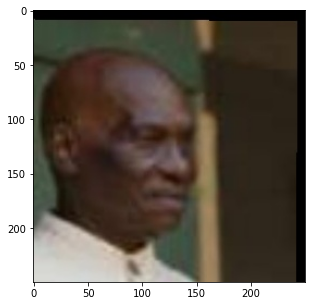

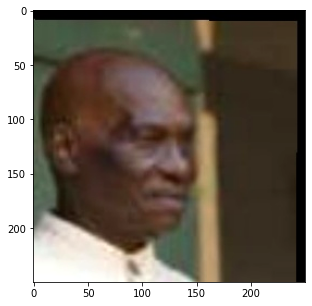

In [2]:
image = Image.open('4.jpg')

plt.figure(figsize=(5,5))
plt.imshow(image)

transform1 = transforms.ToTensor()
tensor = transform1(image)
t = transforms.functional.adjust_gamma(tensor, gamma=1, gain=1.2)

transform2 = transforms.ToPILImage()

# convert the tensor to PIL image using above transform
img = transform2(t)

plt.figure(figsize=(5,5))
plt.imshow(img)

# Pixel brightness transformations(PBT)


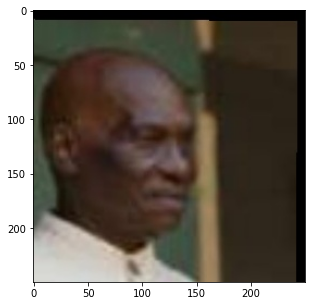

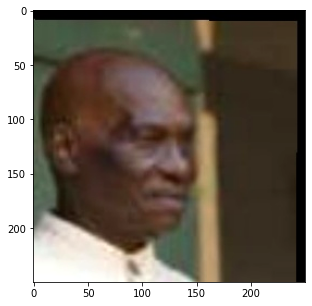

In [3]:
image = Image.open('4.jpg')

plt.figure(figsize=(5,5))
plt.imshow(image)

transform1 = transforms.ToTensor()
tensor = transform1(image)
t = transforms.functional.adjust_brightness(tensor,1.2)#adjust_gamma(tensor, gamma=2, gain=3)

transform2 = transforms.ToPILImage()

# convert the tensor to PIL image using above transform
img = transform2(t)

plt.figure(figsize=(5,5))
plt.imshow(img)

# Histogram equalization

In [4]:
# image = Image.open('4.jpg')
# #
# rgb_equalized_cv = []

# equ00 = torch.tensor(cv2.equalizeHist(K.utils.tensor_to_image(img[0].mul(255).clamp(0, 255).byte())))
# equ01 = torch.tensor(cv2.equalizeHist(K.utils.tensor_to_image(img[1].mul(255).clamp(0, 255).byte())))
# equ02 = torch.tensor(cv2.equalizeHist(K.utils.tensor_to_image(img[2].mul(255).clamp(0, 255).byte())))
# rgb_equalized_cv.append(torch.stack([equ00, equ01, equ02]))
# rgb_equalized_cv = torch.stack(rgb_equalized_cv)

# histogram_img(rgb_equalized_cv[plot_indices] / 255.)

# plt.figure(figsize=(5,5))
# plt.imshow(histogram_img)

# multi object detection (Yolo)

Using cache found in C:\Users\s.ezati/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-18 Python-3.7.6 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 250x250 (no detections)
Speed: 13.0ms pre-process, 336.6ms inference, 15.6ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs\detect\exp159


KeyError: 'dog'

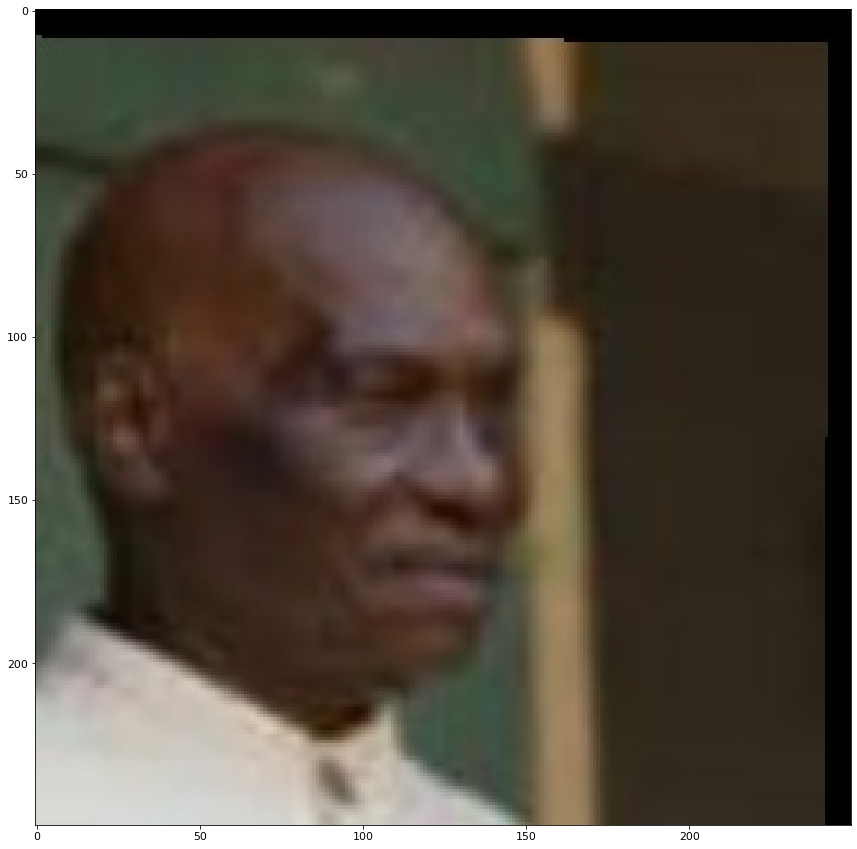

In [5]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Images
#imgs = ['2.jpg']  # batch of images
imgs = cv2.cvtColor(cv2.imread("4.jpg"),cv2.COLOR_BGR2RGB)

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()
results.xyxy[0]  # img1 predictions (tensor)
objects = results.pandas().xyxy[0]  # img1 predictions (pandas)


plt.figure(figsize=(15,15))
plt.imshow(imgs)


objects_count = objects.groupby(['name'])['class'].count()
print("dog: " ,objects_count['dog'])
print('_____________________________________________________________')
print("objects in img : \n", objects_count)
print('_____________________________________________________________')

objects

# face detection (yolo)

In [6]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

Using cache found in C:\Users\s.ezati/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-9-18 Python-3.7.6 torch-1.11.0+cpu CPU

Fusing layers... 
newYOLOv5s summary: 224 layers, 7053910 parameters, 0 gradients
Adding AutoShape... 


<class 'PIL.JpegImagePlugin.JpegImageFile'>


image 1/1: 220x220 3 Faces
Speed: 9.0ms pre-process, 478.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs\detect\exp162


image 1/1: 220x220 3 Faces
Speed: 9.0ms pre-process, 478.8ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
(113, 84, 3)
(313, 484, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


NameError: name 'imgplot' is not defined

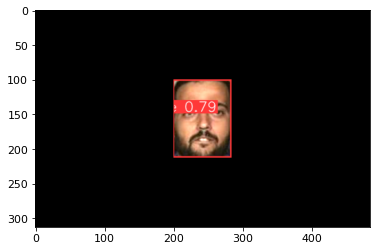

In [13]:

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='face_detection_yolov5s.pt',device='cpu')

image = Image.open('1.jpg')
#plt.imshow(image)
print(type(image))
new = image.resize((220, 220))
#plt.imshow(new)

transform1 = transforms.ToTensor()
tensor = transform1(new)
t = transforms.functional.adjust_gamma(tensor, gamma=1, gain=1.4)

transform2 = transforms.ToPILImage()

# convert the tensor to PIL image using above transform
img = transform2(t)

# plt.figure(figsize=(5,5))
# plt.imshow(image)

# imgs = cv2.cvtColor(cv2.imread("4.jpg"),cv2.COLOR_BGR2RGB)
# print(type(imgs))
# img = imgs.copy()
img = np.array(img)

results = model(img)

print(results)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
faces = results.pandas().xyxy[0]
#faces = faces.sort_values(by='confidence', ascending=False)



# #Face 4
# for res in results.xyxy[0]:
#     res = np.array(res.detach().cpu())
#     x = round(res[0])
#     y = round(res[1])
#     w = round(res[2])
#     h = round(res[3])
#     #img = cv2.rectangle(imgs, (x, y), (w, h), (0,255,0), 2)
# img = img[y:h, x:w]

# img_sizes = faces.loc[[0],['xmin','ymin','xmax','ymax']]
x = round(faces['xmin'][0])
y = round(faces['ymin'][0])
w = round(faces['xmax'][0])
h = round(faces['ymax'][0])
img = img[y:h, x:w]
print(img.shape)
#padding
img1 = np.pad(img, ((100, 100), (200, 200), (0,0)), constant_values=0)

print(img1.shape)

plt.imshow(img1)

#plt.savefig("pad_image_01.png", bbox_inches='tight', dpi=100)

plt.show()
#padding






#imgplot = Image.fromarray(img)
#print(img.shape)
#print(type(imgplot))


new = imgplot.resize((240,240))
plt.figure(figsize=(5,5))
plt.imshow(new)


# faces_count = faces.groupby(['name'])['class'].count()
# print('_____________________________________________________________')
# print( faces_count)
# print('_____________________________________________________________')




In [ ]:
type(faces['confidence'][0])

C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


(1098, 1600, 3)
<class 'numpy.ndarray'>


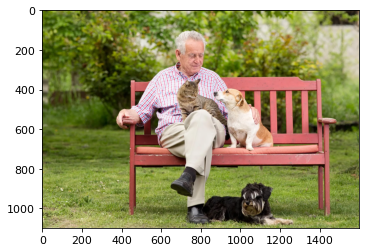

In [12]:
from matplotlib import image

import matplotlib.pyplot as plt

img = image.imread("3.jpg")

plt.imshow(img)

plt.show()

print(img.shape)
print(type(img))


(1298, 2000, 3)


C:\Users\s.ezati\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


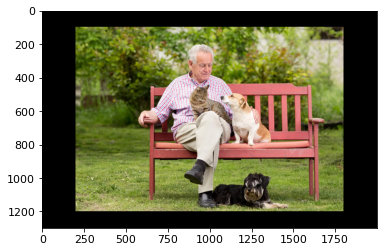

In [11]:
img1 = np.pad(img, ((100, 100), (200, 200), (0,0)), constant_values=0)

print(img1.shape)

plt.imshow(img1)

plt.savefig("pad_image_01.png", bbox_inches='tight', dpi=100)

plt.show()

In [ ]:
import pandas as pd
d = {'index':[0],'name': [0], 'distance': [0]}
df = pd.DataFrame(data=d)
index = 0
 
df['index'][0]= 1
df['name'][0] = 1
df['distance'][0] = 1

df['index'][0]


df = df.append({'index':index, 'name':25, 'distance':'Madrid'}, ignore_index=True)
df = df.append({'index':index, 'name':25, 'distance':'Madrid'}, ignore_index=True)
df = df.append({'index':index, 'name':25, 'distance':'Madrid'}, ignore_index=True)

df['name'][0]
for i in range(0,len(df)):
    print(i)

In [ ]:
x = np.ones((3, 3, 3))
y = np.pad(x, pad_width=1)
y.shape